In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_excel('C:/Concordia Semester 3/System Analytics/Case_1/IMB881.xlsx', sheet_name = 'Data on Sample ONLY')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerCode      5820 non-null   object 
 1   CountryName       5820 non-null   object 
 2   USA               5781 non-null   float64
 3   UK                5781 non-null   float64
 4   Italy             5781 non-null   float64
 5   Belgium           5781 non-null   float64
 6   Romania           5781 non-null   float64
 7   Australia         5781 non-null   float64
 8   India             5781 non-null   float64
 9   QtyRequired       5820 non-null   int64  
 10  ITEM_NAME         5820 non-null   object 
 11  Hand Tufted       5820 non-null   int64  
 12  Durry             5820 non-null   int64  
 13  Double Back       5820 non-null   int64  
 14  Hand Woven        5820 non-null   int64  
 15  Knotted           5820 non-null   int64  
 16  Jacquard          5820 non-null   int64  


C:\Users\asmaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


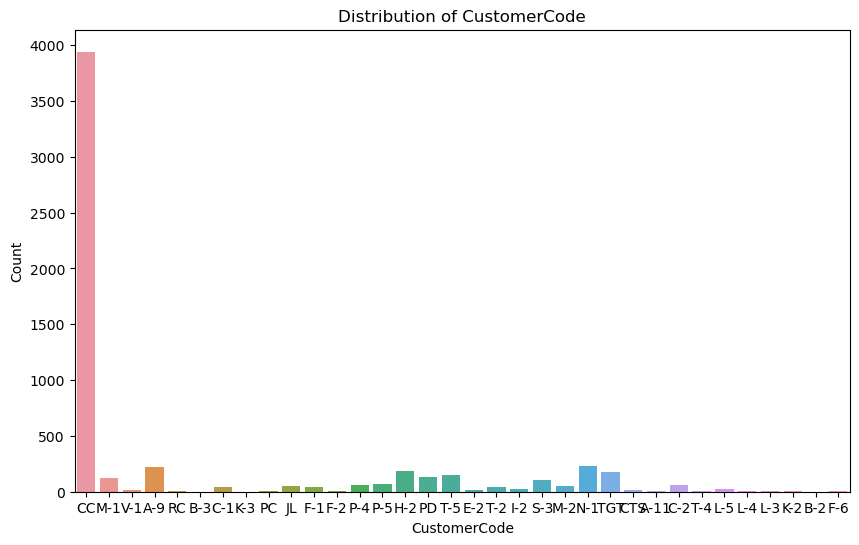

C:\Users\asmaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asmaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\asmaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

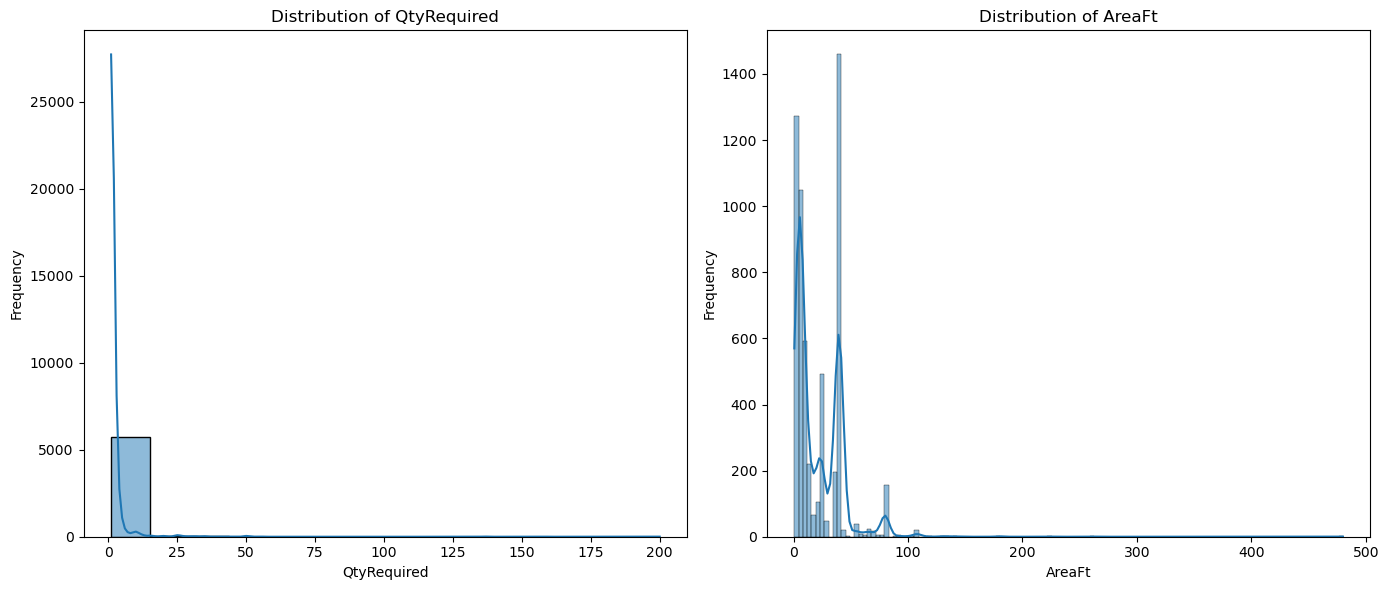

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Categorical Feature (Bar Chart)
categorical_feature = 'CustomerCode'
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_feature, data=data)
plt.title(f'Distribution of {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.show()

# Numeric Features (Histograms)
numeric_features = ['QtyRequired', 'AreaFt']
plt.figure(figsize=(14, 6))

for i, feature in enumerate(numeric_features, start=1):
    plt.subplot(1, len(numeric_features), i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Random Forest

In [6]:
X = data.drop(['Order Conversion', 'CountryName', 'ITEM_NAME', 'ShapeName'], axis=1)
y = data['Order Conversion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['AreaFt','QtyRequired']
categorical_features = ['CustomerCode']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing and Random Oversampling to the training set
X_train_preprocessed = preprocessor.fit_transform(X_train)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_preprocessed , y_train)

# Train a RandomForestClassifier on the resampled training set
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Preprocess the test set
X_test_preprocessed = preprocessor.transform(X_test)

# Make predictions on the preprocessed test set
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7981099656357389
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       935
           1       0.49      0.72      0.58       229

    accuracy                           0.80      1164
   macro avg       0.71      0.77      0.72      1164
weighted avg       0.84      0.80      0.81      1164



## An example to test the random forest model

In [7]:
# Create a sample DataFrame with feature values
sample_data = {
    'CustomerCode': ['M-1'],
    'USA': [1],
    'UK': [0],
    'Italy': [0],
    'Belgium': [0],
    'Romania': [0],
    'Australia': [0],
    'India': [0],
    'QtyRequired': [1],
    'ITEM_NAME': ['HAND TUFTED'],
    'ShapeName': ['REC'],
    'AreaFt': [80]
}

sample_df = pd.DataFrame(sample_data)

# Preprocess the sample data using the same preprocessor used for training
sample_preprocessed = preprocessor.transform(sample_df)

# Make predictions using the trained model
prediction = model.predict(sample_preprocessed)

# Print the prediction
print("Model Prediction:", prediction)


Model Prediction: [1]


## Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Train a DecisionTreeClassifier on the resampled training set
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the preprocessed test set using Decision Tree
dt_y_pred = dt_model.predict(X_test_preprocessed)

# Evaluate the Decision Tree model
print("Decision Tree - Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Decision Tree - Classification Report:")
print(classification_report(y_test, dt_y_pred))

Decision Tree - Accuracy: 0.7981099656357389
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       935
           1       0.49      0.69      0.57       229

    accuracy                           0.80      1164
   macro avg       0.70      0.76      0.72      1164
weighted avg       0.83      0.80      0.81      1164



## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# Train a LogisticRegression model on the resampled training set
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the preprocessed test set using Logistic Regression
lr_y_pred = lr_model.predict(X_test_preprocessed)

# Evaluate the Logistic Regression model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, lr_y_pred))

Logistic Regression - Accuracy: 0.6623711340206185
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       935
           1       0.34      0.73      0.46       229

    accuracy                           0.66      1164
   macro avg       0.62      0.69      0.61      1164
weighted avg       0.80      0.66      0.70      1164



## k-Nearest Neighbors (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNeighborsClassifier on the resampled training set
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the preprocessed test set using KNN
knn_y_pred = knn_model.predict(X_test_preprocessed)

# Evaluate the KNN model
print("KNN - Accuracy:", accuracy_score(y_test, knn_y_pred))
print("KNN - Classification Report:")
print(classification_report(y_test, knn_y_pred))

KNN - Accuracy: 0.8625429553264605
KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       935
           1       0.69      0.54      0.61       229

    accuracy                           0.86      1164
   macro avg       0.79      0.74      0.76      1164
weighted avg       0.85      0.86      0.86      1164

